# <b>PREPROCESSING</b>

In [115]:
#import and modify data

import pandas as pd
import datetime as dt
import numpy as np
import json

#import dataconcurrent.futures
data = pd.read_csv('data.csv')

# transform date strings to datetime objects
data['date'] = pd.to_datetime(data['date'])

#get rid of decks from beta
release_date = dt.datetime(2014, 3, 11)
data = data[data ['date'] > release_date]


y = data['deck_set'].ravel()

#print out each unique deck set
deck_set = []

for i in range (0,y.size):
    if y[i] not in deck_set:
        deck_set.append(y[i])

print(deck_set)

['Explorers', 'Old Gods', 'Classic Nerfs', 'Karazhan', 'Yogg Nerf', 'Gadgetzan', 'Aggro Downfall', 'Live Patch 5314', 'Naxx Launch', 'Live Patch 5170', 'GvG Launch', 'Live Patch 5506', 'Undertaker Nerf', 'Blackrock Launch', 'TGT Launch', 'Live Patch 4973', 'Beta Patch 4944', 'Warsong Nerf', 'GvG Prelaunch', 'Live Patch 5435']


In [116]:
#remove junk ratings
data = data[data ['rating'] > 0]

In [117]:
#python "enum" for card type
from enum import Enum

class CardEnum(Enum):
    artist = 0
    attack = 1
    cardClass = 2
    classes = 3
    collectible = 4
    collectionTest = 5
    cost = 6
    dbfId = 7
    durability = 8
    elite = 9
    entourage = 10
    faction = 11
    flavor = 12
    health = 13
    hideStats = 14
    howToEarn = 15
    howToEarnGolden = 16
    id_ = 17
    mechanics = 18
    multiClassGroup = 19
    name = 20
    overload = 21
    playRequirements = 22
    playerClass = 23
    race = 24
    rarity = 25
    referencedTags = 26
    set_ = 27
    spellDamage = 28
    targetingArrowText = 29
    text = 30  
    type_ = 31
    


In [118]:
#getCard and getCards methods + json opening

import json
import pandas as pd

#create the global 'refs' pandas dataframe from the json file
with open('refs.json', encoding="utf8") as file:
    refs = json.load(file);
refs = pd.DataFrame(refs);

#use json file and card ID to return the specific card
def getCard(id): 
    x = refs.loc[refs['dbfId'] == id]
    return x.values.ravel()

#returns a list of cards from a deck (returns 0 if deck does not have 41 elements)
def getCards(deck):
    if len(deck) != 41:
        return 0
    cards_t = deck[11:41]
    cards_s = []
    for i in range(0,30):
        cards_s.append(getCard(cards_t[i]))
    return cards_s
    
#s = getCards(ALL_DECKS[0])
#print(s)

In [119]:
#organize card types

#create array of the different card sets
print(len(refs), "cards")
sets = []
for i in range (0,3117):
    if refs.loc[i].set not in sets:
        sets.append(refs.loc[i].set)
        
print("card types: ", sets)

#dictionary of card deck_set to deck deck_set
CARD_DECK_SET = {"TGT" : "TGT Launch", "CREDITS" : "n/a", "TB" : "n/a", "GANGS" : "Gadgetzan", "CORE" : "n/a",
                "LOE" : "Explorers", "EXPERT1" : "n/a", "CHEAT" : "n/a", "HERO_SKINS" : "n/a", "UNGORO" : "n/a",
                "HOF" : "n/a", "BRM" : "Blackrock Launch", "MISSIONS" : "n/a", "OG" : "Old Gods", "GVG" : "GvG Launch",
                "NAXX" : "Naxx Launch", "KARA" : "Karazhan"}

#Throw out decks containing cards of type 'TB', 'CREDITS', 'CHEAT'

3117 cards
card types:  ['TGT', 'CREDITS', 'TB', 'GANGS', 'CORE', 'LOE', 'EXPERT1', 'CHEAT', 'HERO_SKINS', 'UNGORO', 'HOF', 'BRM', 'MISSIONS', 'OG', 'GVG', 'NAXX', 'KARA', nan]


In [120]:
# #create a matrix of the decks and their card's types

# import pandas as pd
# from time import time

# cols = []
# for i in range(0,30):
#     col_name = "card_" + str(i)
#     cols.append(col_name)
    
# cards = data[cols]
# #cards = cards[:4]

# set_type = cards.copy()
# set_type[:] = ""

# print("starting..")
# start_t = time()

# for i in range(0, len(refs)):
#     id_ = (refs.iloc[i])["dbfId"]
#     set_ = (refs.iloc[i])["set"]
#     d_idx = (cards == id_)
#     set_type[d_idx] = set_

# print("finished! total time: ", time()-start_t)
# #print(set_type)
            

#  (JASON) Calculate total mana cost of each deck and remove decks with any Tavern Brawl Cards

In [121]:
from time import time
with open('refs.json', encoding="utf8") as file:
    refs = json.load(file);
refs = pd.DataFrame(refs);    

start_time = time();

# grab all the card columns 
cols = [];
for i in range (0, 30):
    col_name = "card_" + str(i);
    cols.append(col_name);
cards = data[cols]; 
#cards = cards[0:15]; # limit the amount of rows for testing

mana_costs = cards.copy();

set_type = cards.copy();
set_type[:] = "";

type_type = cards.copy();
type_type[:] = "";

# create matrix with the cards corresponding data
for i in range(0, len(refs)):
    id = (refs.iloc[i])["dbfId"];
    cost = (refs.iloc[i])["cost"];
    set = (refs.iloc[i])["set"];
    type = (refs.iloc[i])["type"];
    
    card_idx = (cards == id);
    if np.isnan(cost):
        cost = 0;
    mana_costs[card_idx] = cost;

    set_type[card_idx] = set;
    
    type_type[card_idx] = type;
# calculate the total mana cost for each deck
total_mana_costs = np.sum(mana_costs, axis=1);
data["mana_cost"] = total_mana_costs; # add total mana cost column to data

# remove decks with tavern brawl cards
decks_wout_tb = ~(set_type == 'TB').any(axis=1);
good_decks = cards[decks_wout_tb]; # use this if you want to verify it works on a smaller dataset
data = data[decks_wout_tb];# <-- USE THIS IF YOU WANT TO REMOVE FROM ACTUAL DATASET

#calculate totale number of creatures
total_creatures = (type_type == 'MINION');
m = np.sum(total_creatures, axis=1)
m = np.divide(m,30)
data['creature ratio'] = m

elapsed_time = time() - start_time;
print("elapsed_time =", elapsed_time);

# print(mana_costs)
#print(total_mana_costs) # each row corresponds to deck (i)

NameError: name 'total_creatures' is not defined

In [122]:
total_creatures = (type_type == 'MINION');
m = np.sum(total_creatures, axis=1)
m = np.divide(m,30)
data['creature ratio'] = m

In [123]:
# ##REMOVE 'TB'

# type_tb = (set_type == 'TB')
# y = data['deck_id'].ravel()
# mat = type_tb.as_matrix()

# tb_deck_ids = []

# print("starting..")
# start_t = time()

# for i in range (0,len(mat)):
#     if np.any(mat[i]):
#         tb_deck_ids.append(y[i])

# print("finished! total time: ", time()-start_t)
# print(len(tb_deck_ids))

In [124]:
# print(len(tb_deck_ids))

In [125]:
# ##REMOVE 'CREDITS'

# type_tb = (set_type == 'CREDITS')
# y = data['deck_id'].ravel()
# mat = type_tb.as_matrix()

# credits_deck_ids = []

# print("starting..")
# start_t = time()

# for i in range (0,len(mat)):
#     if np.any(mat[i]):
#         credits_deck_ids.append(y[i])

# print("finished! total time: ", time()-start_t)
# print(len(credits_deck_ids))

In [126]:
# ##REMOVE 'CHEAT'

# type_tb = (set_type == 'CHEAT')
# y = data['deck_id'].ravel()
# mat = type_tb.as_matrix()

# cheat_deck_ids = []

# print("starting..")
# start_t = time()

# for i in range (0,len(mat)):
#     if np.any(mat[i]):
#         cheat_deck_ids.append(y[i])

# print("finished! total time: ", time()-start_t)
# print(len(cheat_deck_ids))

In [127]:
# # remove bad decks

# print("starting cut..")
# start_t = time()
# for i in range(0, len(tb_deck_ids)):
#     data = data[data ['deck_id'] != tb_deck_ids[i]]

# print("finished! total time: ", time()-start_t)


In [128]:
#create arrays for different deck sets and setup datetimes for them

from enum import Enum

#create a dictionary that splits the dataset into arrays by their deck set
DECK_SET = {"Explorers" : [],"Old Gods" : [], "Classic Nerfs" : [], "Karazhan" : [], "Yogg Nerf" : [], "Gadgetzan" : [], "Aggro Downfall" : [], 
"Live Patch 5314" : [], "Beta Patch 4482" : [], "Naxx Launch" : [], "Live Patch 5170" : [], "Beta Patch 4458" : [], "Beta Patch 4243" : [], 
            "GvG Launch" : [], "Live Patch 5506" : [], "Undertaker Nerf" : [], "Blackrock Launch" : [], "Beta Patch 4217" : [], "TGT Launch" : [], 
            "Beta Patch 3937" : [], "Live Patch 4973" : [], "Beta Patch 4944" : [], "Warsong Nerf" : [], "GvG Prelaunch" : [], "Live Patch 5435" : [], 
            "Beta Patch 3664" : [], "Beta Patch 3749" : [], "Beta Patch 3890" : [], "Beta Patch 3645" : [], "Beta Patch 3604" : [], "Beta Patch 3388" : [], 
            "Beta Release" : []}

ALL_DECKS = []
y = data['deck_set'].ravel()
data_array = np.asarray(data)

for i in range (0,y.size):
    DECK_SET[y[i]].append(data_array[i])
    ALL_DECKS.append(data_array[i])

#set up time table for launches
release_dates = {
    'Explorers' : dt.datetime(2015, 11, 12),
    'Old Gods' : dt.datetime(2016, 4, 26),
    'Classic Nerfs' : dt.datetime(2016, 3, 14),
    'Yogg Nerf' : dt.datetime(2016, 10, 3),
    'Karazhan' : dt.datetime(2016, 8, 11),
    'Gadgetzan' : dt.datetime(2016, 12, 1),
    'Naxx Launch' : dt.datetime(2014, 7, 22),
    'Live Patch 5506' : dt.datetime(2014, 5, 28),
    'Undertaker Nerf' : dt.datetime(2015, 1, 29),
    'Blackrock Launch' : dt.datetime(2015, 4, 2),
    'GvG Launch' : dt.datetime(2014, 12, 8),
    'TGT Launch' : dt.datetime(2015, 8, 24),
    'Warsong Nerf' : dt.datetime(2016, 1, 16),
    'Live Patch 4973' : dt.datetime(2014, 3, 14),
    'Aggro Downfall' : dt.datetime(2017, 2, 28),
    # 'Beta Patch 4944' : datetime(2014, 3, 11),
    # 'GvG Prelaunch' : datetime(2014, 12, 5)
}

print("done")



done


In [129]:
#organize card types

#create array of the different card sets
print(len(refs), "cards")
sets = []
for i in range (0,3117):
    if refs.loc[i].set not in sets:
        sets.append(refs.loc[i].set)
        
print("card types: ", sets)

#dictionary of card deck_set to deck deck_set
CARD_DECK_SET = {"TGT" : "TGT Launch", "CREDITS" : "n/a", "TB" : "n/a", "GANGS" : "Gadgetzan", "CORE" : "n/a",
                "LOE" : "Explorers", "EXPERT1" : "n/a", "CHEAT" : "n/a", "HERO_SKINS" : "n/a", "UNGORO" : "n/a",
                "HOF" : "n/a", "BRM" : "Blackrock Launch", "MISSIONS" : "n/a", "OG" : "Old Gods", "GVG" : "GvG Launch",
                "NAXX" : "Naxx Launch", "KARA" : "Karazhan"}



3117 cards
card types:  ['TGT', 'CREDITS', 'TB', 'GANGS', 'CORE', 'LOE', 'EXPERT1', 'CHEAT', 'HERO_SKINS', 'UNGORO', 'HOF', 'BRM', 'MISSIONS', 'OG', 'GVG', 'NAXX', 'KARA', nan]


## Rarity Via Dust

In [130]:
# #rarity using dust
# import pandas as pd
# from time import time

# dust_data = pd.read_csv('dust_costs.csv')

# def getCost(card):
#     i = str(card[CardEnum.id_.value])
#     dt = dust_data[(dust_data['card_id'] ==i)].loc('CRAFTING_NORMAL')[:]
#     dtn = np.asarray(dt.cost)   
#     if dt.empty:
#         return 0
#     return np.asarray(dt.cost)[0]

# def getCostId(idd):
#     dt = dust_data[(dust_data['card_id'] == idd)].loc('CRAFTING_NORMAL')[:]
#     dtn = np.asarray(dt.cost) 
#     if dt.empty:
#         return 0
#     return np.asarray(dt.cost)[0]

# print("starting..")
# cols = []
# for i in range(0,30):
#     col_name = "card_" + str(i)
#     cols.append(col_name)
    
# cards = data[cols]
# #cards = cards[:1]
# new_cards = cards.copy()
# new_cards[:] = 0
# start_t = time();

# for i in range(0, len(refs)):
#     id_ = (refs.iloc[i])["dbfId"]
#     c = getCard(id_)
#     if c.size == 0:
#         continue
#     cost = getCost(c)
#     d_idx = (cards == id_)
#     new_cards[d_idx] = cost
    
# print("Elapsed time: ", time()-start_t)
# total_dust_costs = np.sum(new_cards, axis=1);
# print(total_dust_costs)


## (JASON) Total Mana Cost

In [131]:
# from time import time
# start_time = time();

# # grab all the card columns 
# cols = [];
# for i in range (0, 30):
#     col_name = "card_" + str(i);
#     cols.append(col_name);
# cards = data[cols]; 
# #cards = cards[0:3]; # limit the amount of rows for testing

# mana_costs = cards.copy();

# # replace each card with their corresponding mana cost
# for i in range(0, len(refs)):
#     id = (refs.iloc[i])["dbfId"];
#     cost = (refs.iloc[i])["cost"];
    
#     decks_mana_idx = (cards == id);
#     if np.isnan(cost):
#         cost = 0;
#     mana_costs[decks_mana_idx] = cost;

# # average the mana cost for each deck
# total_mana_costs = np.sum(mana_costs, axis=1);

# elapsed_time = time() - start_time;
# print("elapsed_time =", elapsed_time);

# # print(mana_costs)
# print(total_mana_costs) # each row corresponds to deck (i)

## (JASON) Card Frequency

In [134]:
# from time import time
start_time = time();

# grab all the card columns 
cols = [];
for i in range (0, 30):
    col_name = "card_" + str(i);
    cols.append(col_name);
cards = data[cols]; 
#cards = cards[0:3]; # limit the amount of rows for testing

max_id = refs["dbfId"].max();
card_freq = np.zeros(int(max_id) + 1);
dbfId = np.arange(int(max_id) + 1)

# count the frequency of cards
for i in range(0, len(refs)):
    id = (refs.iloc[i])["dbfId"];
    
    if not (np.isnan(id)):
        card_idx = (cards == id);
        card_freq[int(id)] = card_idx.sum().sum();

# keep only the nonzero points
nonzero_idx = card_freq != 0; # find the nonzero points
dbfId = dbfId[nonzero_idx];
card_freq = card_freq[nonzero_idx];
        
elapsed_time = time() - start_time;
print("elapsed_time =", elapsed_time);
        
#print(card_freq)
#print(np.max(card_freq))

elapsed_time = 282.219290971756


In [135]:
# from time import time
start_time = time();

# grab all the card columns 
cols = [];
for i in range (0, 30):
    col_name = "card_" + str(i);
    cols.append(col_name);
cards = data[cols]; 
#cards = cards[0:3]; # limit the amount of rows for testing

card_freq_score = cards.copy();

# replace each card with the corresponding card frequency
idx = 0;
for id in dbfId:
    card_idx = (cards == id);
    card_freq_score[card_idx] = card_freq[idx];
    idx = idx + 1;

# sum each row to get card frequency score of each deck
card_freq_score = np.sum(card_freq_score, axis=1); # sum card frequencies to get score
data["card_freq_score"] = card_freq_score; # add card frequency score column to data
        
elapsed_time = time() - start_time;
print("elapsed_time =", elapsed_time);
        
#print(card_freq_score)
#print(np.max(card_freq))

elapsed_time = 176.71727991104126


In [137]:
#print(data['card_freq_score'])

## BOKEH

In [138]:
# import warnings
# warnings.filterwarnings('ignore')

# import pandas as pd
# import numpy as np
# from bokeh.models.widgets import Panel, Tabs
# from bokeh.models import CustomJS, ColumnDataSource, HoverTool, BoxZoomTool
# from bokeh.transform import jitter
# from bokeh.plotting import figure, output_notebook, show
# from bokeh.palettes import magma
# from bokeh.transform import factor_cmap

# c_set = ['TGT', 'TGT Launch', 'CREDITS','TB', 'GANGS', 'CORE','LOE', 'EXPERT1', 'CHEAT', 'HERO_SKINS', 
#        'UNGORO', 'HOF', 'BRM', 'MISSIONS', 'OG', 'GVG', 'NAXX', 'KARA']

# #print(data)

# source1 = ColumnDataSource(data=dict(
#     x = data['total_card_freq'],
#     y = data['rating'],
#     ds = data['deck_set']
# ))

# source2 = ColumnDataSource(data=dict(

# ))

# hover = HoverTool(tooltips=[

# ])

# color_p = ['#3CD059', '#E8DC68', "#E88368", '#225ea8', '#41b6c4', '#a1dab4', '#ffffcc']


# p1 = figure(plot_width=600, plot_height=400, x_axis_label="Age", y_axis_label="log Salary",
#             tools=[hover, 'wheel_zoom', 'pan', 'reset'])

# #p1.circle('x', 'y', size=10, source=source1, legend="pos", fill_color=factor_cmap('pos', palette=color_p, factors=c_set))
# p1.circle('x', 'y', size=10, source=source1, legend="deck_set", fill_color=factor_cmap('ds', palette=color_p, factors=c_set))

# tab1 = Panel(child=p1, title="Age")

# #p2 = figure(plot_width=600, plot_height=400, x_axis_label="PSG", y_axis_label="log Salary", 
# #            tools=[hover, 'wheel_zoom', 'pan', 'reset'])

# #p2.circle('x', 'y', size=10, source=source2, legend="pos", fill_color=factor_cmap('pos', palette=color_p, factors=position))

# #tab2 = Panel(child=p2, title="PSG")

# p1.legend.location = "bottom_right"
# p1.legend.orientation = "horizontal"
# #p2.legend.location = "bottom_right"
# #p2.legend.orientation = "horizontal"
# #tabs = Tabs(tabs=[ tab1, tab2 ])
# tabs = Tabs(tabs=[ tab1])
# show(tabs)


# output_notebook() ##

## CLASS DUMMY CODING

In [139]:
from sklearn import preprocessing

print("starting..")
start_time = time();

#new_data = data[:5]
new_data = data['deck_class']
new_data = new_data.as_matrix()

le = preprocessing.LabelEncoder()
le.fit(["Druid", "Hunter", "Paladin", "Priest", "Rogue", "Shaman", "Warlock", "Warrior", "Mage"])

#ohe_data = new_data.apply(le.fit_transform)

#ohe_data = ohe_data['deck_class']
ohe_data = le.transform(new_data)
ohe_data = ohe_data.reshape(-1,1)

enc = preprocessing.OneHotEncoder()
enc.fit(ohe_data)

onehotlabels = enc.transform(ohe_data).toarray()

elapsed_time = time() - start_time;
print("elapsed_time =", elapsed_time)


starting..
elapsed_time = 0.2657358646392822


In [140]:
print(onehotlabels)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]


## (JUSTIN) BINS

In [141]:

# filename = "data.csv"
# rating = pd.read_csv(filename, usecols = ['rating'])

# with open('refs.json', encoding="utf8") as file:
#     refs = json.load(file);
# refs2 = pd.DataFrame(refs, columns = ['dbfId', 'cost']);

rating = data['rating']

bucket = []

print("starting..")
start_time = time();

for i, row in enumerate(rating.values):
    if (row >= 100):
        bucket.append(1)
    else:
        bucket.append(0)

# for i, row in enumerate(rating.values):
#     if (row >= 500):
#         bucket.append(5)
#     elif (row >= 100):
#         bucket.append (4)
#     elif (row >=50):
#         bucket.append(3)
#     elif(row >= 1):
#         bucket.append(2)
#     elif(row>=1):
#         bucket.append(1)
#     else:
#         bucket.append(0)
        
print("elapsed_time =", elapsed_time)

starting..
elapsed_time = 0.2657358646392822


# DUMMY CODE ARCHETYPE



In [142]:


y = data['deck_archetype'].ravel()

#print out each unique deck set
deck_arc = []

for i in range (0,y.size):
    if y[i] not in deck_arc:
        deck_arc.append(y[i])
print(deck_arc)

from sklearn import preprocessing

print("starting..")
start_time = time();
##############################################
#new_data = data[:5]
new_data_2 = data['deck_archetype']
new_data_2 = new_data_2.as_matrix()

lel = preprocessing.LabelEncoder()
lel.fit(deck_arc)

#ohe_data = new_data.apply(le.fit_transform)

#ohe_data = ohe_data['deck_class']
ohe_data_2 = lel.transform(new_data_2)
ohe_data_2 = ohe_data_2.reshape(-1,1)

enc2 = preprocessing.OneHotEncoder()
enc2.fit(ohe_data_2)

onehotlabels2 = enc2.transform(ohe_data_2).toarray()

elapsed_time = time() - start_time;
print("elapsed_time =", elapsed_time)

['Unknown', 'Fatigue Mage', 'Mill Rogue', 'Miracle Rogue', 'Midrange Shaman', 'Control Priest', 'Demonlock', 'Reno Mage', 'Ramp Druid', 'Zoolock', "N'Zoth Hunter", 'Malygos Rogue', 'Tempo Mage', 'Control Shaman', "C'Thun Druid", "C'Thun Warrior", "C'Thun Priest", "N'Zoth Rogue", 'Control Warrior', 'Murlocadin', 'Aggro Shaman', 'Aggroadin', 'Freeze Mage', 'Yogg Mage', "N'Zoth Paladin", 'Face Hunter', "C'Thun Rogue", 'Mech Shaman', 'Reno Rogue', 'Discardlock', "C'Thun Warlock", 'Patron Warrior', 'Renolock', 'Dragon Priest', 'Yogg Hunter', 'Beast Druid', 'Midrange Hunter', 'Fatigue Warrior', 'Secret Pally', 'Dragonadin', 'Yogg Druid', "N'Zoth Priest", 'Reno Priest', 'Handlock', 'Secrets Hunter', 'Shadow Priest', 'Reno Pally', 'Astral Druid', 'Murlock', 'Miracle Druid', 'Totem Shaman', 'Reno Hunter', 'Dragon Warrior', 'Token Druid', 'Dragon Shaman', 'Pirate Rogue', 'Secret Mage', 'Worgen OTK Warrior', "N'Zoth Mage", "N'Zoth Druid", 'Tempo Warrior', 'Resurrect Priest', 'Mech Mage', 'Malyloc

## PUTTING FEATURES TOGETHER

In [146]:
Deck_Buckets = bucket
Deck_Class = onehotlabels
Deck_Archetype = onehotlabels2
Deck_TotalFreq = data['card_freq_score']
Deck_TotalMana = data["mana_cost"]
Deck_CraftCost = data['craft_cost']
Deck_MinionRatio = data['creature ratio']

Deck_TotalFreq = Deck_TotalFreq.values.reshape(-1,1)
Deck_TotalMana = Deck_TotalMana.values.reshape(-1,1)
Deck_CraftCost = Deck_CraftCost.values.reshape(-1,1)
Deck_MinionRatio = Deck_MinionRatio.values.reshape(-1,1)
Deck_Buckets = np.asarray(Deck_Buckets)

print(Deck_Archetype.shape)
print(Deck_Class.shape)
print(Deck_TotalFreq.shape)
print(Deck_TotalMana.shape)
print(Deck_CraftCost.shape)
print(Deck_MinionRatio.shape)
print(Deck_Buckets.shape)

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
Deck_TotalFreq = min_max_scaler.fit_transform(Deck_TotalFreq)
Deck_TotalMana = min_max_scaler.fit_transform(Deck_TotalMana)
Deck_CraftCost = min_max_scaler.fit_transform(Deck_CraftCost)

Deck_X = np.hstack((Deck_Class, Deck_Archetype, Deck_TotalFreq, Deck_TotalMana, Deck_CraftCost, Deck_MinionRatio))
Deck_y = Deck_Buckets

(299517, 76)
(299517, 9)
(299517, 1)
(299517, 1)
(299517, 1)
(299517, 1)
(299517,)


C:\Users\Jonathan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [147]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
Deck_TotalFreq = min_max_scaler.fit_transform(Deck_TotalFreq)
Deck_TotalMana = min_max_scaler.fit_transform(Deck_TotalMana)
Deck_CraftCost = min_max_scaler.fit_transform(Deck_CraftCost)


# Fix the Imbalance

In [148]:
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

X_global = Deck_X
y_global = Deck_y 
X_train_global, X_test_global, y_train_global, y_test_global = train_test_split(X_global, y_global, test_size=0.33, random_state=0)
#sm = SMOTE(random_state=12, ratio = 1.0)
#x_train_res, y_train_res = sm.fit_sample(X_train_global,  y_train_global)

In [149]:
# training_features, test_features, training_target, test_target, = train_test_split(loans_relevant_enconded.drop(['bad_loans'], axis=1),
#                                                loans_relevant_enconded['bad_loans'],
#                                                test_size = .1,
#                                                random_state=12)

x_train, x_val, y_train, y_val = train_test_split(X_train_global, y_train_global,
                                                  test_size = .1,
                                                  random_state=12)
sm = SMOTE(random_state=12, ratio = "minority")
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)
print( 'Validation Results')
print( clf_rf.score(x_val, y_val))
print( recall_score(y_val, clf_rf.predict(x_val)))
print( '\nTest Results')
print (clf_rf.score(X_test_global, y_test_global))
print (recall_score(y_test_global, clf_rf.predict(X_test_global)))

dum_prediction = np.zeros((y_test_global.size, 1))
print( '\nDumb Results')
print (clf_rf.score(X_test_global, dum_prediction))
print (recall_score(y_test_global, dum_prediction))

Validation Results
0.98375523221
0.0

Test Results
0.984287896723
0.0120481927711

Dumb Results
0.988385386631
0.0


In [150]:
mat = confusion_matrix(y_test_global, clf_rf.predict(X_test_global))

print(mat)

mat = confusion_matrix(y_test_global, dum_prediction)

print(mat)

[[97283  1143]
 [  410     5]]
[[98426     0]
 [  415     0]]


In [151]:
print(x_train_res.shape)

(359654, 89)


# Undersampling

In [152]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.under_sampling import RandomUnderSampler

print(__doc__)

# Generate the dataset
X = Deck_X
y = Deck_y
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply the random under-sampling
rus = RandomUnderSampler(return_indices=True)
X_resampled, y_resampled, idx_resampled = rus.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)



Automatically created module for IPython interactive environment


In [153]:
new_x = X_resampled
new_y = y_resampled
print(new_x.shape)
print(new_y.shape)
X_train, X_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.33, random_state=0)
clf_rf2 = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf2.fit(X_train, y_train)
mat = confusion_matrix(y_test, clf_rf2.predict(X_test))

print(mat)

dum_prediction = np.ones((y_test.size, 1))
mat = confusion_matrix(y_test, dum_prediction)

print(mat)

print(accuracy_score(y_test, clf_rf2.predict(X_test)))
print(accuracy_score(y_test, dum_prediction))

(2556, 89)
(2556,)
[[255 172]
 [180 237]]
[[  0 427]
 [  0 417]]
0.582938388626
0.494075829384


In [154]:
###### from sklearn.ensemble import RandomForestClassifier

X = Deck_X
y = Deck_y 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#clf = RandomForestClassifier(max_depth=6, random_state=0, n_jobs=10,n_estimators=200,class_weight ={2:10000,3:1,4:4,5:100000000})
clf = RandomForestClassifier(max_depth=6, random_state=0, n_jobs=10,n_estimators=200)

start_t = time()
#clf.fit(X_train, y_train)
fit_t = time()
fit_t = fit_t - start_t
start_t = time()
y_pred = clf_rf2.predict(X_test)
pred_t = time()
pred_t = pred_t - start_t
mat = confusion_matrix(y_test, y_pred)

print("confusion matrix\n", mat)
print("time to train: ", fit_t, "(s) time to predict: ", pred_t, "(s)")
# print("feature importances: ", clf.feature_importances_)

confusion matrix
 [[56843 41550]
 [   65   383]]
time to train:  0.0 (s) time to predict:  0.3533973693847656 (s)


In [155]:
from sklearn.ensemble import VotingClassifier

X = Deck_X
y = Deck_y 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

fits = []
for i in range(0,10):
    rus = RandomUnderSampler(return_indices=True)
    X_resampled, y_resampled, idx_resampled = rus.fit_sample(X_train, y_train)
    X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=0)
    clf_rf2 = RandomForestClassifier(n_estimators=25, random_state=12)
    clf_rf2.fit(X_train_rus, y_train_rus)
    fits.append(clf_rf2)

preds = []
for i in range(0,10):
    y_pr = fits[i].predict(X_test)
    preds.append(y_pr)

res = []
for i in range(0,len(y_test)):
    x = [item[0] for item in preds]
    if np.sum(x)>7:
        res.append(1)
    else:
        res.append(0)
print("finished!")

finished!


In [156]:

mat = confusion_matrix(y_test, res)
print(mat)

[[    0 98393]
 [    0   448]]


# SVM


In [157]:
from sklearn.svm import SVC

X = Deck_X
y = Deck_y 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

start_t = time()

clf_svc = SVC(C=1.0, kernel='poly', degree=3, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
    class_weight={0:1,1:10}, max_iter=-1, decision_function_shape='ovr', random_state=None)

clf_svc.fit(X_train, y_train)

pred = clf_svc.predict(X_test)

print("done! ", (time()-start_t))

mat = confusion_matrix(y_test, pred)
print(mat)

done!  240.09505128860474
[[98393     0]
 [  448     0]]


## XGBOOST

In [193]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = Deck_X
y = Deck_y

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size = .33,
                                                  random_state=42)
sm = SMOTE(random_state=12, ratio = "minority")
X_train_OS, y_train_OS = sm.fit_sample(X_train, y_train)

rus = RandomUnderSampler(return_indices=True)
X_train_US, y_train_US, idx_resampled = rus.fit_sample(X_train, y_train)


#clf = XGBClassifier(max_depth=4, random_state=0, learning_rate=0.001, n_estimators=1000)
clf = XGBClassifier(max_depth=10, random_state=0, n_jobs=10,n_estimators=500,learning_rate=1)
start_t = time()
clf.fit(X_train_US, y_train_US)
fit_t = time()
fit_t = fit_t - start_t
start_t = time()
y_pred = clf.predict(X_test)
pred_t = time()
pred_t = pred_t - start_t
mat = confusion_matrix(y_test, y_pred)

print(mat)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# err = (fn+fp)/(tn+fp+fn+tp)
# print("\n\nXGBoost")
# print("Design Choices: Max depth of 6 yielded better results, but increased the time to fit / predict")
# print("mean error rate: ", err)


# print("confusion matrix\n", mat)
print("time to train: ", fit_t, "(s) time to predict: ", pred_t, "(s)")
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
# print("feature importances: ", clf.feature_importances_)

[[54525 43868]
 [  199   249]]
time to train:  1.1053714752197266 (s) time to predict:  0.5304105281829834 (s)
0.554162746229
0.555803571429


In [194]:
from sklearn.metrics import accuracy_score

p = clf.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test, p[:,1])
print(auc)

dum_prediction = np.zeros((y_test.size, 1))
print(accuracy_score(y_test_global, y_pred))
print(accuracy_score(y_test_global, dum_prediction))

0.573578216674
0.553181372103
0.995801337502


## RANDOM FOREST

In [197]:
###### from sklearn.ensemble import RandomForestClassifier
X = Deck_X
y = Deck_y

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size = .33,
                                                  random_state=42)
sm = SMOTE(random_state=12, ratio = "minority")
X_train_OS, y_train_OS = sm.fit_sample(X_train, y_train)

rus = RandomUnderSampler(return_indices=True)
X_train_US, y_train_US, idx_resampled = rus.fit_sample(X_train, y_train)

#clf = RandomForestClassifier(max_depth=6, random_state=0, n_jobs=10,n_estimators=200,class_weight ={2:10000,3:1,4:4,5:100000000})
clf = RandomForestClassifier(max_depth=6, random_state=0, n_jobs=10,n_estimators=200)

start_t = time()
clf.fit(X_train_US, y_train_US)
fit_t = time()
fit_t = fit_t - start_t
start_t = time()
y_pred = clf.predict(X_test)
pred_t = time()
pred_t = pred_t - start_t
mat = confusion_matrix(y_test, y_pred)
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# err = (fn+fp)/(tn+fp+fn+tp)
# print("Random Forest")
# print("Design Choices: The Max depth of 6 gave the best mean error rate of 1-6")
# print("mean error rate: ", err)
print("confusion matrix\n", mat)
print("time to train: ", fit_t, "(s) time to predict: ", pred_t, "(s)")
print(accuracy_score(y_test, y_pred))
p = clf.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test, p[:,1])
print(auc)
print(recall_score(y_test, y_pred))
# print("feature importances: ", clf.feature_importances_)

confusion matrix
 [[57109 41284]
 [  180   268]]
time to train:  0.2155742645263672 (s) time to predict:  0.4501974582672119 (s)
0.58049797149
0.623600841414
0.598214285714


In [161]:
print(accuracy_score(y_test, y_pred))
dum_prediction = np.ones((y_test.size, 1))
print(accuracy_score(y_test, dum_prediction))

0.995626306265
0.0043736937346


## GRADIENT BOOST

In [201]:
from sklearn.ensemble import GradientBoostingClassifier

X = Deck_X
y = Deck_y

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size = .33,
                                                  random_state=42)
sm = SMOTE(random_state=12, ratio = "minority")
X_train_OS, y_train_OS = sm.fit_sample(X_train, y_train)

rus = RandomUnderSampler(return_indices=True)
X_train_US, y_train_US, idx_resampled = rus.fit_sample(X_train, y_train)

clf = GradientBoostingClassifier(max_depth=6, random_state=0)
start_t = time()
clf.fit(X_train_US, y_train_US)
fit_t = time()
fit_t = fit_t - start_t
start_t = time()
y_pred = clf.predict(X_test)
pred_t = time()
pred_t = pred_t - start_t
mat = confusion_matrix(y_test, y_pred)
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# err = (fn+fp)/(tn+fp+fn+tp)
# print("\n\nGradient Boosting Decision Trees")
# print("Design Choices: Max depth of 6 yielded better results, but increased the time to fit / predict")
# print("mean error rate: ", err)
print("confusion matrix\n", mat)
print("time to train: ", fit_t, "(s) time to predict: ", pred_t, "(s)")
print(accuracy_score(y_test, y_pred))
p = clf.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test, p[:,1])
print(auc)
print(recall_score(y_test, y_pred))

confusion matrix
 [[54627 43766]
 [  174   274]]
time to train:  0.5384016036987305 (s) time to predict:  0.3539419174194336 (s)
0.555447638126
0.618351041868
0.611607142857


[  6.87691691e-03   4.49217370e-03   3.43418956e-03   9.03815302e-03
   1.32189613e-02   5.43669465e-03   9.43847989e-03   5.95509921e-03
   9.75409502e-03   3.73305441e-03   6.38056078e-03   0.00000000e+00
   2.80832355e-03   1.25885741e-03   1.00873758e-03   4.53104296e-03
   0.00000000e+00   5.45459727e-05   1.97318914e-03   4.62192241e-06
   2.62857272e-03   1.06739871e-03   3.72832360e-03   6.06367521e-03
   1.29543079e-04   3.72249773e-03   2.26278825e-03   0.00000000e+00
   2.64487281e-03   0.00000000e+00   0.00000000e+00   1.03063315e-03
   5.61831890e-04   7.09554601e-04   2.66557980e-03   3.85631470e-03
   5.34966766e-03   3.90112104e-03   0.00000000e+00   2.87917199e-03
   1.48547231e-03   0.00000000e+00   5.13345292e-03   4.16091295e-03
   4.31215930e-03   2.53039709e-03   1.96410762e-03   1.50238136e-03
   0.00000000e+00   2.27171047e-03   1.13605174e-06   0.00000000e+00
   5.73781406e-03   3.63677548e-03   3.86098178e-03   0.00000000e+00
   0.00000000e+00   2.04565083e-03

ValueError: incompatible sizes: argument 'height' must be length 1 or scalar

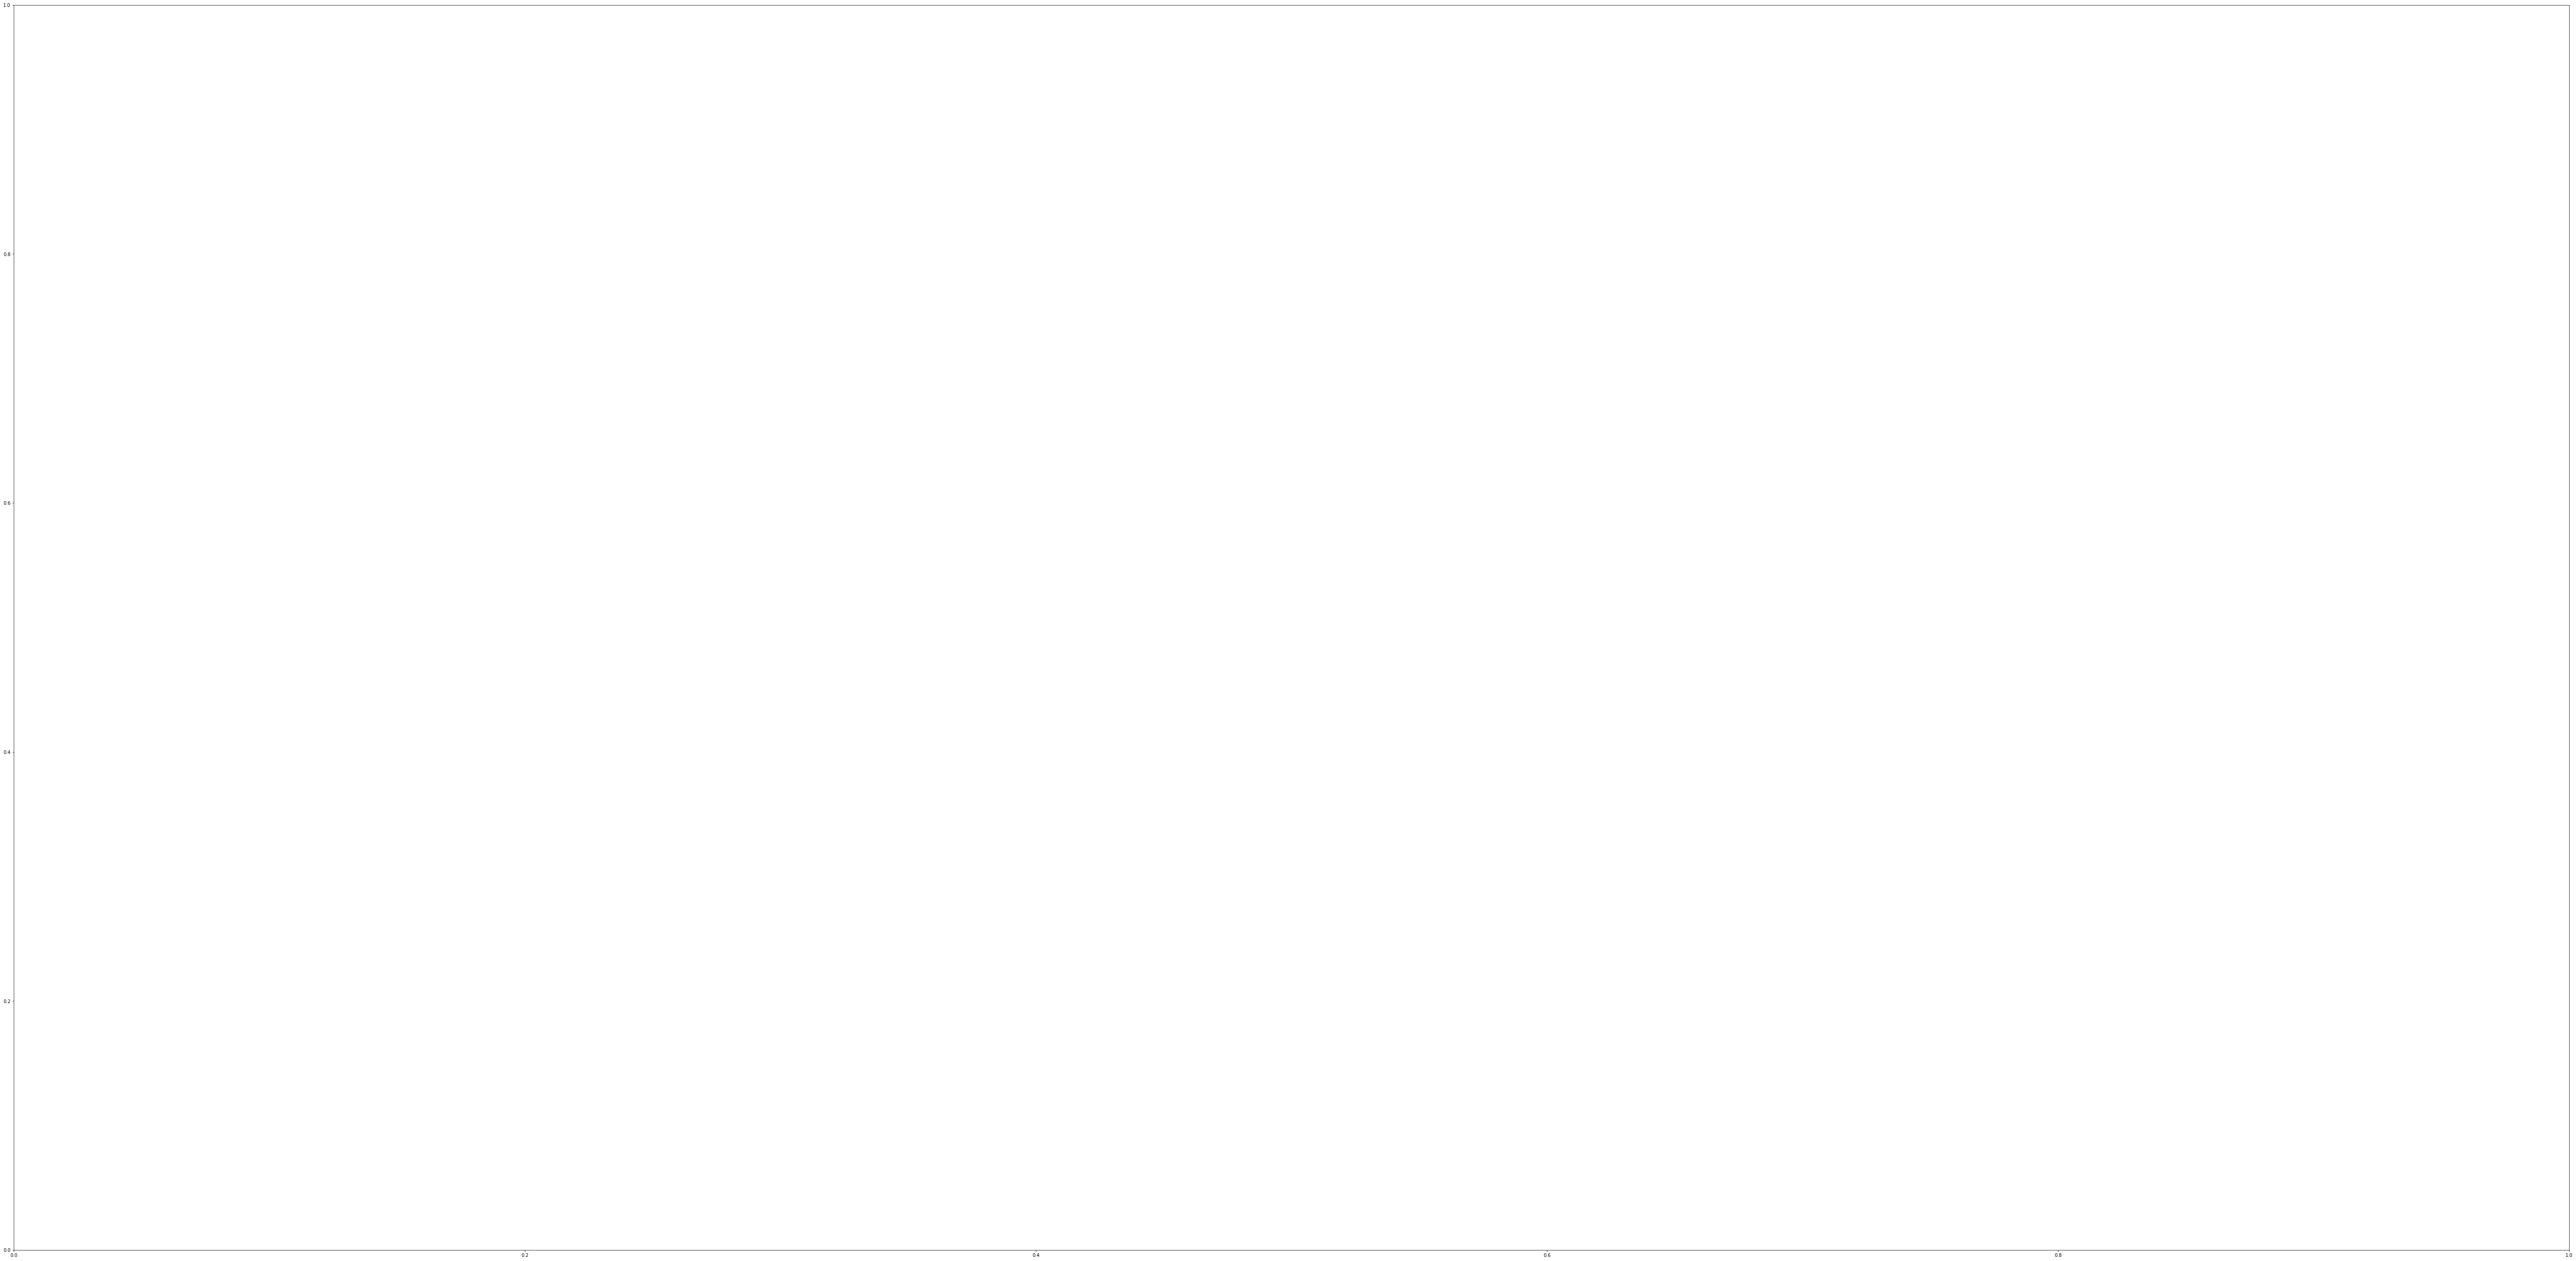

In [216]:
print(clf.feature_importances_)
from matplotlib import pyplot as plt

print(len(clf.feature_importances_))

arr = np.ndarray.tolist(clf.feature_importances_)


plt.figure(figsize=(100, 50));
plt.bar(89, arr);
plt.xticks(fontsize=100);
plt.yticks(fontsize=100);
plt.ylabel('log of rating amount', fontsize=100);
plt.xlabel('Rating (buckets from 0-5)', fontsize=100)
plt.show();

## MLP REGRESSOR

In [163]:
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import glob
import math
from numpy import inf

X = Deck_X
#y = Deck_y
y = np.asarray(data['rating'])
#y = np.log(y)
#y[y < 0] = 0
#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
batch_size=5000, learning_rate_init = 0.0001, hidden_layer_sizes = (4,), max_iter = 2000)

RMSE_final=0

kf = KFold(n_splits=5)

print("starting...")
start_t = time()

for (train_index, test_index) in kf.split(X_train, y_train):
    #get split
    X_fold_train = np.matrix(X_train)[train_index]
    X_fold_test = np.matrix(X_train)[test_index]
    y_fold_train = np.array(y_train)[train_index]
    y_fold_test = np.array(y_train)[test_index]
    
    #scale the test inputs
    sc = StandardScaler()
    sc.fit(X_fold_train)
    X_fold_test = sc.transform(X_fold_test)
    
    #clf fit
    clf.fit(X_fold_train, y_fold_train)
    
    #make some predictions
    y_fold_pred = clf.predict(X_fold_test)
    
    #rate it
    RMSE_fold = mean_squared_error(y_fold_test, y_fold_pred)
    RMSE_fold = math.sqrt(RMSE_fold)
    RMSE_final = RMSE_final + RMSE_fold
    
RMSE_final = RMSE_final/5

print("finished! took ", time()-start_t)

print("RMSE: %f" % RMSE_final)

clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
dum_prediction = np.zeros((y_test.size, 1))
MSE = mean_squared_error(y_test, prediction)
print(MSE)
MSE2 = mean_squared_error(y_test, dum_prediction)
print("dum mse: ", MSE2)

starting...
finished! took  302.9948260784149
RMSE: 23.182120
542.072594888
dum mse:  551.354144535


In [55]:
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
dum_prediction = np.zeros((y_test.size, 1))
MSE = mean_squared_error(y_test, prediction)
print(MSE)
MSE2 = mean_squared_error(y_test, dum_prediction)
print("dum mse: ", MSE2)
#print(prediction)

542.006923984
dum mse:  551.354144535


C:\Users\Jonathan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# from sklearn.model_selection import (train_test_split,KFold)
# from sklearn.metrics import mean_squared_error
# from sklearn.neural_network import MLPRegressor
# from sklearn.preprocessing import StandardScaler
# import glob
# import math
# from numpy import inf

# X = Deck_X
# #y = Deck_y
# y = np.asarray(data['rating'])
# y = np.log(y)
# y[y < 0] = 0
# print(y)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# clf = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
# batch_size=5000, learning_rate_init = 0.0005, hidden_layer_sizes = (4,))

# RMSE_final=0

# kf = KFold(n_splits=5)

# print("starting...")
# start_t = time()

# for (train_index, test_index) in kf.split(X_train, y_train):
#     #get split
#     X_fold_train = np.matrix(X_train)[train_index]
#     X_fold_test = np.matrix(X_train)[test_index]
#     y_fold_train = np.array(y_train)[train_index]
#     y_fold_test = np.array(y_train)[test_index]
    
#     #scale the test inputs
#     sc = StandardScaler()
#     sc.fit(X_fold_train)
#     X_fold_test = sc.transform(X_fold_test)
    
#     #clf fit
#     clf.fit(X_fold_train, y_fold_train)
    
#     #make some predictions
#     y_fold_pred = clf.predict(X_fold_test)
    
#     #rate it
#     RMSE_fold = mean_squared_error(y_fold_test, y_fold_pred)
#     RMSE_fold = math.sqrt(RMSE_fold)
#     RMSE_final = RMSE_final + RMSE_fold
    
# RMSE_final = RMSE_final/5

# print("finished! took ", time()-start_t)

# print("RMSE: %f" % RMSE_final)

# clf.fit(X_train, y_train)
# prediction = clf.predict(X_test)
# dum_prediction = np.zeros((y_test.size, 1))
# MSE = mean_squared_error(y_test, prediction)
# print(MSE)
# MSE2 = mean_squared_error(y_test, dum_prediction)
# print("dum mse: ", MSE2)
#print(prediction)

## MLP CLASSIFIER

In [162]:
from sklearn.neural_network import MLPClassifier

X = Deck_X
y = Deck_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# clf = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
# batch_size=5000, learning_rate_init = 0.0005, hidden_layer_sizes = (4,))

clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

dum_prediction = np.ones((y_test.size, 1))

clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
MSE = mean_squared_error(y_test, prediction)
print("test mse: ", MSE)
MSE2 = mean_squared_error(y_test, dum_prediction)
print("dum mse: ", MSE2)
#print(prediction[0:1000])
#print(y_test[0:1000])

test mse:  0.288743437649
dum mse:  0.288743437649


## Logistic Regression

In [229]:
from sklearn.linear_model import LogisticRegression



X = Deck_X
#y = Deck_y
print("starting..")
start_t = time()
y = np.asarray(data['rating'])



lr = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, random_state=None)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lr.fit(X_train, y_train)
pred = lr.predict(X_test)
MSE = mean_squared_error(y_test, pred)
print("finished! time: ", time() - start_t)
print("test mse: ", MSE)

starting..
finished! time:  603.4399793148041
test mse:  437.960202203


In [164]:
MSE2 = mean_squared_error(y_test, dum_prediction)
print("dum mse: ", MSE2)

dum mse:  551.354144535


## KNN

In [306]:
from sklearn.neighbors import KNeighborsClassifier

X = Deck_X
y = Deck_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("starting..")
start_t = time()

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                      metric='minkowski', metric_params=None, n_jobs=10)
knn.fit(X_train, y_train)

# pred = knn.predict(y_test)

# dum_prediction = np.ones((y_test.size, 1))
# print("finished! time: ", time() - start_t)
# MSE = mean_squared_error(y_test, pred)
# print("test mse: ", MSE)
# MSE2 = mean_squared_error(y_test, dum_prediction)
# print("dum mse: ", MSE2)

starting..


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=10, n_neighbors=5, p=2,
           weights='uniform')

In [309]:
pred = knn.predict(X_test)
dum_prediction = np.ones((y_test.size, 1))
MSE = mean_squared_error(y_test, pred)
print("test mse: ", MSE)
MSE2 = mean_squared_error(y_test, dum_prediction)
print("dum mse: ", MSE2)

test mse:  0.282190588926
dum mse:  0.26594227092


# Decision Trees


In [366]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
import math

%matplotlib inline

from sklearn import datasets



X = Deck_X
y = np.asarray(data['rating'])
#y = np.log(y)
#y[y < 0] = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

regressor = DecisionTreeRegressor(max_depth=6)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("Part A - depth=6")
print("test mse =  %f" % mse)
y_pred = regressor.predict(X_train)
mse = mean_squared_error(y_train,y_pred)
print("train mse = %f" % mse)
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("Part B - depth=2")
print("test mse =  %f" % mse)
y_pred = regressor.predict(X_train)
mse = mean_squared_error(y_train,y_pred)
print("train mse = %f" % mse)
dum_prediction = np.ones((y_test.size, 1))
mse = mean_squared_error(y_test, dum_prediction)
print("dum mse = %f" % mse)

Part A - depth=6
test mse =  549.762528
train mse = 545.091242
Part B - depth=2
test mse =  545.723093
train mse = 549.205619
dum mse = 546.385913


# LDA QDA and NBGaussian


C:\Users\Jonathan\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Jonathan\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Part 1
LDA: the probability of the class being digits 8 or digits 9 for every row
[[ 0.3469045   0.6530955 ]
 [ 0.61157302  0.38842698]
 [ 0.33167938  0.66832062]
 ..., 
 [ 0.30232987  0.69767013]
 [ 0.61509435  0.38490565]
 [ 0.2520683   0.7479317 ]]
QDA: the probability of the class being digits 8 or digits 9 for every row
[[  4.05724398e-207   1.00000000e+000]
 [  1.77008778e-116   1.00000000e+000]
 [  1.42259575e-191   1.00000000e+000]
 ..., 
 [  8.59202006e-239   1.00000000e+000]
 [  1.48495797e-217   1.00000000e+000]
 [  6.30033860e-207   1.00000000e+000]]
NBGaussian: the probability of the class being digits 8 or digits 9 for every row
[[  1.05011901e-62   1.00000000e+00]
 [  1.00000000e+00   2.15735119e-41]
 [  1.47404167e-81   1.00000000e+00]
 ..., 
 [  1.01196182e-55   1.00000000e+00]
 [  3.06209365e-55   1.00000000e+00]
 [  7.04429029e-63   1.00000000e+00]]
0.564755516435
[[55542 42851]
 [  169   279]]
0.0344796187817
[[ 2969 95424]
 [    9   439]]
0.0737345838265
[[ 6867 91

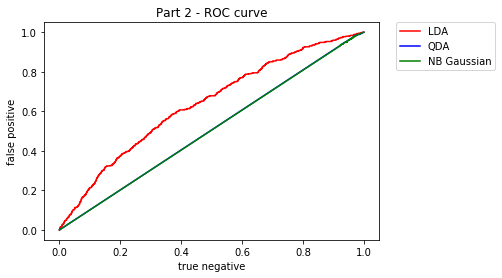

In [188]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.metrics import recall_score, precision_score
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata



X = Deck_X
y = Deck_y

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size = .33,
                                                  random_state=42)
sm = SMOTE(random_state=12, ratio = "minority")
x_train_OS, y_train_OS = sm.fit_sample(X_train, y_train)

rus = RandomUnderSampler(return_indices=True)
X_train_US, y_train_US, idx_resampled = rus.fit_sample(X_train, y_train)


#LDA
clf1 = LDA(n_components=None, priors=None, shrinkage=None, solver='svd', store_covariance=False, tol=0.0001)
clf1.fit(x_train_OS, y_train_OS)

#QDA
clf2 = QDA(priors=None, tol=0.0001)
clf2.fit(x_train_OS, y_train_OS)

#Naive
clf3 = GaussianNB()
clf3.fit(x_train_OS, y_train_OS)

print("Part 1")

#ROC
p1 = clf1.predict_proba(X_test)
p1_p = clf1.predict(X_test)
print("LDA: the probability of the class being digits 8 or digits 9 for every row")
print(p1)
p2 = clf2.predict_proba(X_test)
p2_p = clf2.predict(X_test)
print("QDA: the probability of the class being digits 8 or digits 9 for every row")
print(p2)
p3 = clf3.predict_proba(X_test)
p3_p = clf3.predict(X_test)
print("NBGaussian: the probability of the class being digits 8 or digits 9 for every row")
print(p3)
#print(p[:,0])


#fpr1, tpr1, thresholds = metrics.roc_curve(y_test, clf1.decision_function(X_test))
fpr1, tpr1, thresholds = metrics.roc_curve(y_test, p1[:,1])
auc_lda = metrics.roc_auc_score(y_test, p1[:,1])
sensitivity_lda = recall_score(y_test, p1_p)
precision_lda = precision_score(y_test, p1_p)
print(accuracy_score(y_test, p1_p))
print(confusion_matrix(y_test, p1_p))

#fpr2, tpr2, thresholds = metrics.roc_curve(y_test, clf2.decision_function(X_test))
fpr2, tpr2, thresholds = metrics.roc_curve(y_test, p2[:,1])
auc_qda = metrics.roc_auc_score(y_test,  p2[:,1])
sensitivity_qda = recall_score(y_test, p2_p)
precision_qda = precision_score(y_test, p2_p)
print(accuracy_score(y_test, p2_p))
print(confusion_matrix(y_test, p2_p))

fpr3, tpr3, thresholds = metrics.roc_curve(y_test, p3[:,1])
auc_nbg = metrics.roc_auc_score(y_test, p3[:,1])
sensitivity_nbg = recall_score(y_test, p3_p)
precision_nbg = precision_score(y_test, p3_p)
print(accuracy_score(y_test, p3_p))
print(confusion_matrix(y_test, p3_p))

#plot it
fig1 = plt.figure()


red_patch = mpatches.Patch(color='red', label='LDA')
#plt.legend(handles=[red_patch], loc = 2)
ax1 = fig1.add_subplot(111)
ax1.plot(fpr1,tpr1,color='red', label="LDA")

blue_patch = mpatches.Patch(color='blue', label='QDA')
#plt.legend(handles=[blue_patch], loc = 3)
ax2 = fig1.add_subplot(111)
ax2.plot(fpr2,tpr2, color = 'blue', label="QDA")

green_patch = mpatches.Patch(color='green', label='NB Gaussian')
#plt.legend(handles=[green_patch], loc=4)
ax3 = fig1.add_subplot(111)
ax3.plot(fpr3,tpr3, color='green', label="NB Gaussian")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel("true negative")
plt.ylabel("false positive")
plt.title("Part 2 - ROC curve")

print("part 3: Area under curve")
print("LDA:", auc_lda, sensitivity_lda, precision_lda)
print("QDA:", auc_qda, sensitivity_qda, precision_lda)
print("NBG:", auc_nbg, sensitivity_nbg, precision_lda)

## OLD CODE

In [307]:
# #create an array of the frequency of each card
# import _thread
# import concurrent.futures 
# from concurrent.futures import Executor
# from concurrent.futures import ThreadPoolExecutor
# from time import time

# def Frequency(DECKS):#takes a very long time

#     card_list = []
#     TheList = {}

#     for deck in DECKS:
#         cards = getCards(deck)
#         for card in cards:
#                 id__ = int(CardEnum.dbfId.value)
#                 if card[id__] in card_list:
#                     TheList.update({card[id__] : (TheList[card[id__]]+1)})
#                 elif card[id__] not in card_list:
#                     card_list.append(card[id__])
#                     TheList[card[id__]] = 1
#     return TheList

# def futureFrequency(DECKS_g):
#     print("I'm running!")
#     return Frequency(DECKS_g)

# def chunks(l, n):
#     #"""Yield successive n-sized chunks from l."""
#     for i in range(0, len(l), n):
#         yield l[i:i + n]

# def concurrentFrequency(DECKS, splits):
#     length = len(DECKS)
#     n = int(length/splits)
#     print(n, " sized chunks")
#     chunkies = chunks(deck_, n)
#     futures = []
#     with ThreadPoolExecutor(max_workers = 20) as executor:
#         for split in range (splits):
#             print("Split!")
#             temp = next(chunkies)        
#             futures.append(executor.submit(futureFrequency, temp))

#     for f in futures:
#         f.result()
#         print("one finished!")
#     #    futures.append(_thread.start_new_thread( Frequency, (temp,) ))
#     #for future in futures:
#     #    future.join()
    
        
# #takes approximatly 1 hour

# print("starting...")

# start_t = time()

# result = Frequency(ALL_DECKS)

# end_t = time()

# print("Finished! took ", (end_t-start_t), "seconds")
# import numpy as np

# card_avgs = {9.0: 4203.0, 237.0: 32030, 279.0: 17286, 545.0: 10097, 613.0: 63565, 791.0: 5772, 797.0: 5396, 841.0: 48199, 1186.0: 27147, 1189.0: 7368, 1363.0: 55972, 1365.0: 12030, 1367.0: 41915, 1650.0: 55426, 1933.0: 9452, 1938.0: 12359, 2040.0: 3150, 2067.0: 4954, 1935.0: 18578, 2262.0: 58431, 374.0: 45856, 2280.0: 9420, 2511.0: 2071, 2555.0: 5241, 2566.0: 1250, 2582.0: 13187, 2683.0: 5427, 2736.0: 22790, 2568.0: 2224, 2883.0: 27142, 75.0: 24889, 285.0: 23397, 401.0: 59037, 546.0: 30785, 596.0: 27982, 635.0: 28311, 785.0: 53058, 810.0: 8675, 1023.0: 34707, 1657.0: 45886, 1659.0: 71203, 1721.0: 73132, 1781.0: 56813, 2021.0: 12639, 2064.0: 84897, 2078.0: 60051, 2510.0: 1457, 2729.0: 17319, 195.0: 17811, 315.0: 62590, 531.0: 21675, 555.0: 50821, 614.0: 30181, 662.0: 68648, 1084.0: 21618, 1753.0: 39643, 1783.0: 46815, 1793.0: 101468, 1801.0: 13292, 2037.0: 49533, 38710.0: 18546, 290.0: 51005, 304.0: 11055, 338.0: 16066, 581.0: 26446, 825.0: 158555, 912.0: 18560, 1074.0: 26681, 2018.0: 1667, 2296.0: 9145, 336.0: 7681, 2760.0: 3021, 476.0: 57470, 679.0: 16843, 943.0: 21141, 890.0: 22185, 756.0: 39561, 1073.0: 73976, 1167.0: 39515, 1786.0: 31577, 1804.0: 12329, 2026.0: 30352, 2027.0: 8930, 2029.0: 27738, 2717.0: 5806, 2889.0: 19032, 400.0: 13738, 636.0: 19276, 1805.0: 27211, 1808.0: 11815, 2951.0: 13984, 1007.0: 8459, 90.0: 17009, 389.0: 7309, 1026.0: 3022, 523.0: 2487, 642.0: 5649, 654.0: 19858, 757.0: 39416, 921.0: 3502, 985.0: 26478, 994.0: 8429, 1037.0: 25880, 1098.0: 2807, 1109.0: 19602, 1182.0: 5627, 1940.0: 21199, 2050.0: 20354, 2257.0: 6358, 2490.0: 21016, 2495.0: 1907, 2521.0: 1162, 2576.0: 1327, 2580.0: 13517, 48.0: 33702, 397.0: 2349, 753.0: 8833, 1014.0: 43168, 1029.0: 16582, 1092.0: 29171, 1997.0: 1071, 2012.0: 15910, 2033.0: 3669, 2035.0: 2105, 2046.0: 13793, 2065.0: 1832, 2071.0: 6085, 2073.0: 7970, 2093.0: 17875, 2306.0: 4404, 2507.0: 2987, 2520.0: 3825, 2752.0: 1634, 272.0: 24615, 220.0: 13454, 1790.0: 24304, 1914.0: 43034, 2286.0: 14574, 2409.0: 33792, 2569.0: 31653, 2682.0: 10287, 2748.0: 1439, 2925.0: 2627, 3015.0: 24190, 147.0: 19782, 413.0: 1944, 436.0: 11460, 608.0: 14903, 631.0: 23392, 950.0: 23333, 846.0: 34737, 974.0: 20564, 1806.0: 13230, 2042.0: 7479, 2895.0: 23731, 2949.0: 38813, 113.0: 9833, 405.0: 38809, 564.0: 28600, 1927.0: 12897, 2275.0: 24064, 2541.0: 5420, 2572.0: 11854, 41609.0: 10004, 2874.0: 17423, 2875.0: 10787, 2910.0: 1405, 2964.0: 3623, 77.0: 28533, 175.0: 1506, 395.0: 22747, 447.0: 6650, 587.0: 21797, 672.0: 5511, 906.0: 33747, 1004.0: 39321, 251.0: 52316, 459.0: 35351, 461.0: 39476, 466.0: 13542, 658.0: 37044, 667.0: 36457, 724.0: 19504, 904.0: 54749, 1016.0: 27137, 1064.0: 19075, 1117.0: 39808, 268.0: 18164, 1988.0: 5452, 2095.0: 10478, 2715.0: 4162, 68.0: 8736, 440.0: 5725, 609.0: 17548, 778.0: 44439, 834.0: 6621, 926.0: 4108, 1686.0: 8250, 1800.0: 1563, 2038.0: 940, 2054.0: 736, 2070.0: 13599, 2503.0: 4195, 2579.0: 1515, 242.0: 57424, 70.0: 11064, 847.0: 56666, 2948.0: 16402, 289.0: 14046, 348.0: 12948, 496.0: 5995, 525.0: 2050, 582.0: 3661, 680.0: 4813, 759.0: 14212, 811.0: 8766, 932.0: 25190, 995.0: 2773, 999.0: 13662, 1789.0: 4843, 2032.0: 4100, 2058.0: 2600, 2573.0: 507, 2733.0: 2691, 40341.0: 4188, 640.0: 2397, 878.0: 13120, 344.0: 4252, 2053.0: 30130, 1794.0: 13507, 2754.0: 3408, 2756.0: 1700, 2881.0: 1656, 2894.0: 7613, 138.0: 42104, 22.0: 12954, 1108.0: 4209, 790.0: 7299, 1155.0: 6804, 2036.0: 2438, 2052.0: 975, 180.0: 53312, 282.0: 3044, 345.0: 7744, 630.0: 12872, 1158.0: 32726, 1784.0: 11723, 2766.0: 1573, 2767.0: 1353, 365.0: 18068, 559.0: 19604, 573.0: 13285, 990.0: 11630, 556.0: 1724, 2884.0: 18819, 64.0: 61076, 137.0: 54902, 186.0: 3274, 233.0: 7161, 415.0: 11070, 773.0: 5097, 823.0: 5306, 1161.0: 7276, 1802.0: 3552, 2001.0: 1844, 2044.0: 9045, 2225.0: 3592, 2792.0: 28019, 2793.0: 5158, 69.0: 3816, 281.0: 11723, 602.0: 2767, 754.0: 13359, 763.0: 76232, 2532.0: 725, 2581.0: 2399, 594.0: 14948, 1651.0: 32706, 2655.0: 11452, 23.0: 4733, 734.0: 18416, 777.0: 12221, 891.0: 25168, 1100.0: 19047, 1372.0: 19082, 2288.0: 28180, 2301.0: 8725, 2518.0: 706, 2704.0: 11085, 2919.0: 4679, 172.0: 16483, 1928.0: 10014, 1932.0: 12121, 1934.0: 7784, 2911.0: 2402, 2408.0: 23084, 2596.0: 13555, 41.0: 2221, 216.0: 4861, 284.0: 12384, 511.0: 7055, 538.0: 3684, 801.0: 5135, 804.0: 6788, 2043.0: 3484, 2258.0: 4739, 2500.0: 2080, 2818.0: 2798, 727.0: 3222, 739.0: 20092, 1022.0: 14224, 1174.0: 5854, 2030.0: 470, 2059.0: 5227, 2233.0: 2276, 2499.0: 647, 2577.0: 2391, 2585.0: 398, 2720.0: 1504, 2726.0: 7547, 192.0: 22440, 211.0: 10879, 457.0: 21662, 621.0: 15598, 749.0: 42418, 993.0: 14750, 1080.0: 14091, 1941.0: 6388, 12.0: 1961, 435.0: 1309, 584.0: 13167, 1068.0: 9073, 2504.0: 4076, 95.0: 19674, 254.0: 60535, 420.0: 18826, 601.0: 29673, 1035.0: 16448, 1124.0: 41613, 1371.0: 13739, 2598.0: 2403, 2782.0: 12279, 38113.0: 15469, 38319.0: 39448, 286.0: 3646, 308.0: 13234, 1122.0: 2216, 2076.0: 3818, 2283.0: 6843, 2522.0: 792, 2533.0: 767, 2542.0: 1524, 2571.0: 5140, 493.0: 15849, 742.0: 26592, 920.0: 23603, 1693.0: 3026, 858.0: 629, 2082.0: 6696, 36.0: 6643, 467.0: 5320, 512.0: 2598, 762.0: 5928, 1995.0: 459, 2295.0: 1298, 2783.0: 8144, 2297.0: 1613, 622.0: 2437, 1913.0: 6186, 2062.0: 5843, 2575.0: 4197, 421.0: 6129, 2486.0: 1784, 32.0: 5991, 189.0: 31478, 352.0: 12747, 629.0: 43724, 766.0: 48032, 767.0: 24255, 1008.0: 38870, 239.0: 35860, 2006.0: 12822, 2513.0: 18761, 2610.0: 30741, 2615.0: 10178, 140.0: 9585, 158.0: 9014, 232.0: 4043, 2648.0: 6988, 2727.0: 1805, 250.0: 9396, 736.0: 4536, 1063.0: 15430, 2274.0: 8694, 2898.0: 5879, 2049.0: 2115, 2060.0: 686, 292.0: 4513, 311.0: 1909, 394.0: 3535, 437.0: 46148, 519.0: 24337, 585.0: 24452, 1093.0: 12493, 2260.0: 25720, 2641.0: 9317, 3001.0: 1765, 30.0: 21975, 376.0: 10541, 1361.0: 11842, 1362.0: 34555, 2556.0: 4109, 145.0: 3088, 2281.0: 1682, 2878.0: 11284, 2057.0: 2405, 430.0: 7388, 1087.0: 6933, 2958.0: 3801, 296.0: 42176, 896.0: 6713, 1003.0: 25026, 1243.0: 35508, 1261.0: 35425, 1662.0: 36358, 1860.0: 15327, 2635.0: 14346, 257.0: 5157, 1797.0: 5147, 2517.0: 4733, 2539.0: 1801, 1366.0: 5112, 2308.0: 2711, 2758.0: 5843, 2901.0: 14354, 36111.0: 1822, 39225.0: 5927, 39840.0: 2661, 306.0: 9515, 1810.0: 1406, 1982.0: 3333, 2765.0: 1054, 2028.0: 10210, 141.0: 22583, 712.0: 1585, 755.0: 5634, 979.0: 2880, 1936.0: 8799, 2259.0: 364, 1047.0: 9524, 1655.0: 2266, 291.0: 4776, 2025.0: 1606, 2003.0: 1164, 2780.0: 6877, 2922.0: 8029, 1915.0: 6289, 1858.0: 7745, 1991.0: 3042, 2011.0: 7222, 2502.0: 2468, 748.0: 6518, 1364.0: 3156, 2063.0: 1354, 2627.0: 1107, 592.0: 2937, 1090.0: 27036, 1142.0: 6023, 1221.0: 7660, 1986.0: 5906, 2013.0: 16383, 2068.0: 3041, 2623.0: 2091, 13334.0: 1470, 157.0: 3167, 976.0: 12536, 1656.0: 12822, 2488.0: 3916, 2879.0: 741, 455.0: 8031, 445.0: 2930, 1144.0: 1836, 1369.0: 4395, 2039.0: 1183, 2545.0: 2819, 2546.0: 3009, 238.0: 33916, 2890.0: 21806, 149.0: 2147, 513.0: 19771, 404.0: 7104, 1141.0: 5789, 2612.0: 9175, 503.0: 16283, 2096.0: 2195, 2786.0: 1857, 2552.0: 5507, 1147.0: 1636, 1653.0: 1003, 505.0: 31386, 2010.0: 2516, 2289.0: 13181, 2290.0: 6101, 2514.0: 11997, 9107.0: 2850, 8.0: 11158, 178.0: 1939, 1171.0: 11816, 2004.0: 3942, 2005.0: 4992, 2007.0: 1438, 2595.0: 767, 2620.0: 8620, 1809.0: 5680, 859.0: 7594, 28.0: 17254, 1401.0: 4096, 1634.0: 4330, 196.0: 8053, 2291.0: 6788, 2304.0: 9221, 38578.0: 12870, 39313.0: 1368, 39491.0: 1142, 1796.0: 5055, 1807.0: 15773, 1931.0: 4688, 643.0: 5500, 2497.0: 5029, 699.0: 6394, 2086.0: 2236, 2634.0: 1202, 2638.0: 4419, 2031.0: 1115, 2075.0: 5656, 213.0: 8380, 381.0: 3757, 2278.0: 5211, 51.0: 3262, 299.0: 2672, 866.0: 5447, 2080.0: 650, 2918.0: 11227, 700.0: 3074, 163.0: 3704, 2822.0: 2959, 1910.0: 13817, 2586.0: 1296, 2891.0: 10299, 366.0: 2121, 1737.0: 3544, 1019.0: 5230, 2172.0: 3736, 1985.0: 1978, 2279.0: 10471, 914.0: 11100, 391.0: 3182, 2757.0: 1124, 205.0: 5589, 2230.0: 2418, 2788.0: 1274, 38403.0: 5655, 45.0: 1835, 877.0: 9603, 201.0: 5066, 2882.0: 709, 886.0: 4177, 191.0: 3826, 453.0: 8045, 475.0: 9526, 510.0: 8456, 982.0: 2053, 13879.0: 3119, 915.0: 1254, 2234.0: 401, 2549.0: 1264, 814.0: 5843, 1091.0: 3294, 2893.0: 1110, 606.0: 6717, 570.0: 1446, 1135.0: 1987, 2087.0: 1808, 2564.0: 1169, 2072.0: 4185, 2299.0: 8291, 363.0: 3182, 2594.0: 529, 2768.0: 1792, 2770.0: 5082, 456.0: 2912, 962.0: 926, 1754.0: 852, 2024.0: 1412, 2083.0: 2050, 2085.0: 1321, 2724.0: 2924, 774.0: 8273, 864.0: 13340, 960.0: 4535, 2019.0: 1569, 37.0: 1206, 1370.0: 2437, 2047.0: 2913, 2069.0: 969, 2014.0: 930, 2796.0: 2182, 132.0: 4345, 134.0: 1393, 469.0: 2576, 2617.0: 1501, 2515.0: 2819, 1368.0: 5438, 34.0: 1720, 768.0: 5369, 351.0: 1648, 2999.0: 14573, 2310.0: 6294, 468.0: 2900, 2079.0: 1125, 462.0: 1002, 2899.0: 998, 2002.0: 1147, 2519.0: 2077, 903.0: 1072, 2933.0: 2026, 339.0: 1473, 618.0: 857, 2020.0: 1229, 2066.0: 1161, 2512.0: 3549, 1140.0: 1805, 2284.0: 1160, 919.0: 3172, 1687.0: 1513, 2613.0: 2430, 708.0: 1096, 710.0: 6131, 2785.0: 2024, 2051.0: 1092, 971.0: 2128, 2535.0: 695, 887.0: 1431, 1799.0: 2489, 922.0: 3236, 1937.0: 1386, 2551.0: 1570, 860.0: 2764, 2045.0: 1063, 1522.0: 1655, 854.0: 6602, 2654.0: 1528, 969.0: 1457, 61.0: 2466, 605.0: 14340, 2945.0: 537, 2056.0: 773, 830.0: 2257, 1050.0: 4355, 3007.0: 2047, 2491.0: 284, 2563.0: 1396, 1373.0: 3990, 2493.0: 560, 443.0: 1418, 1281.0: 7149, 2094.0: 1200, 2483.0: 1500, 2892.0: 2164, 38329.0: 1733, 38584.0: 12691, 38727.0: 12935, 38734.0: 11458, 38985.0: 2351, 39002.0: 278, 577.0: 1478, 648.0: 5382, 1791.0: 2071, 38334.0: 10346, 38337.0: 5845, 38468.0: 761, 38916.0: 1286, 2544.0: 2001, 1992.0: 2637, 1993.0: 1451, 383.0: 1285, 1099.0: 6656, 2298.0: 8791, 2081.0: 1223, 2725.0: 743, 2034.0: 718, 2642.0: 848, 997.0: 2229, 38496.0: 19513, 38764.0: 6736, 39034.0: 8446, 2015.0: 2196, 2618.0: 1754, 818.0: 4162, 1998.0: 2136, 2624.0: 820, 67.0: 1430, 2041.0: 627, 2263.0: 421, 526.0: 972, 2505.0: 541, 2484.0: 3696, 2633.0: 314, 2249.0: 1130, 2016.0: 1035, 2587.0: 3038, 2888.0: 1876, 9081.0: 689, 411.0: 1167, 2084.0: 684, 35025.0: 495, 641.0: 1502, 2061.0: 2135, 1658.0: 2301, 2621.0: 636, 2632.0: 491, 38770.0: 677, 567.0: 781, 765.0: 781, 2923.0: 491, 38526.0: 3408, 38738.0: 10864, 38918.0: 9474, 39495.0: 1104, 40566.0: 893, 40574.0: 2001, 2177.0: 1059, 2077.0: 410, 481.0: 749, 38792.0: 1865, 1688.0: 1689, 670.0: 1925, 38653.0: 2508, 38263.0: 12657, 38534.0: 3085, 38888.0: 5130, 39694.0: 7766, 1861.0: 1374, 2961.0: 1375, 38857.0: 18101, 38859.0: 25659, 38863.0: 22434, 38868.0: 19231, 38897.0: 5853, 530.0: 1049, 2017.0: 1091, 1990.0: 1025, 715.0: 960, 38413.0: 3074, 2681.0: 420, 38434.0: 4024, 38922.0: 881, 2753.0: 172, 1989.0: 844, 2639.0: 368, 38621.0: 5382, 38669.0: 324, 38784.0: 6945, 1939.0: 443, 38488.0: 11704, 38547.0: 26139, 38718.0: 10737, 38795.0: 8085, 38882.0: 8535, 38774.0: 10534, 39003.0: 796, 2008.0: 1596, 2055.0: 1879, 855.0: 819, 38418.0: 8409, 39041.0: 2077, 517.0: 1185, 2777.0: 1821, 2723.0: 176, 38452.0: 9890, 38538.0: 10067, 38666.0: 7828, 1133.0: 838, 38725.0: 7074, 38900.0: 8535, 38429.0: 3886, 38433.0: 2534, 38439.0: 3067, 38958.0: 8109, 39033.0: 3691, 38318.0: 8027, 38655.0: 953, 38530.0: 17749, 38532.0: 1761, 38533.0: 331, 38262.0: 2206, 38267.0: 19086, 38436.0: 359, 38722.0: 3397, 39008.0: 7155, 40402.0: 5530, 38265.0: 5263, 38724.0: 4372, 38833.0: 3920, 38875.0: 2004, 38910.0: 2147, 38505.0: 11326, 39046.0: 584, 38454.0: 7798, 38898.0: 1399, 39350.0: 4255, 40397.0: 1419, 38876.0: 6039, 38391.0: 1689, 38475.0: 1804, 38861.0: 2822, 39026.0: 11966, 38517.0: 2709, 38270.0: 1704, 38393.0: 7132, 38957.0: 1018, 38873.0: 1390, 39118.0: 3059, 38740.0: 7393, 38745.0: 5992, 38911.0: 5777, 38340.0: 863, 38864.0: 3081, 38541.0: 978, 38797.0: 2560, 38961.0: 1879, 38528.0: 2305, 38312.0: 2612, 38944.0: 1052, 39119.0: 2486, 38377.0: 3516, 38825.0: 2205, 38426.0: 1087, 38567.0: 1021, 38758.0: 5504, 38913.0: 1903, 38412.0: 1383, 38832.0: 1411, 38943.0: 3097, 1009.0: 5302, 2711.0: 554, 38843.0: 1687, 1241.0: 5468, 2509.0: 300, 38464.0: 622, 38920.0: 5970, 38960.0: 850, 38848.0: 1327, 38461.0: 1251, 38781.0: 1505, 38569.0: 3356, 38914.0: 7545, 38909.0: 439, 40906.0: 3459, 41414.0: 329, 287.0: 769, 2022.0: 459, 2074.0: 794, 2537.0: 320, 783.0: 1373, 38739.0: 1608, 38279.0: 177, 38545.0: 2271, 38749.0: 1587, 38456.0: 945, 38409.0: 2244, 38395.0: 1481, 38414.0: 1226, 38227.0: 2464, 40426.0: 2174, 2763.0: 373, 38407.0: 1202, 38447.0: 2804, 40598.0: 427, 40745.0: 88, 40940.0: 781, 41566.0: 7559, 40408.0: 6939, 39715.0: 7417, 2023.0: 1031, 2088.0: 261, 424.0: 1172, 2628.0: 2081, 38521.0: 473, 38522.0: 272, 38782.0: 186, 39207.0: 1318, 39465.0: 1256, 39712.0: 12028, 40285.0: 4003, 40494.0: 528, 40693.0: 194, 42146.0: 3560, 39374.0: 4256, 40323.0: 2264, 40378.0: 5468, 40407.0: 2268, 40938.0: 5516, 39941.0: 12662, 40281.0: 606, 40324.0: 350, 40954.0: 662, 38304.0: 647, 39841.0: 2876, 40297.0: 2170, 40496.0: 4595, 40935.0: 1484, 41567.0: 4086, 38408.0: 922, 39453.0: 1081, 38531.0: 434, 38463.0: 288, 39197.0: 635, 40375.0: 1317, 40936.0: 2389, 39160.0: 3933, 39492.0: 4856, 39481.0: 7425, 40437.0: 2723, 40441.0: 412, 38895.0: 162, 39417.0: 832, 39747.0: 2060, 40568.0: 1381, 40422.0: 3477, 40455.0: 6396, 40527.0: 11202, 40529.0: 6478, 40596.0: 6495, 39698.0: 8191, 39442.0: 7509, 40465.0: 5514, 40608.0: 9686, 39439.0: 5228, 40339.0: 549, 40486.0: 1635, 39210.0: 7756, 39477.0: 2550, 39554.0: 10101, 41118.0: 531, 39169.0: 6852, 40428.0: 2298, 39740.0: 3206, 40474.0: 1270, 40587.0: 825, 40641.0: 195, 40432.0: 6397, 41126.0: 2325, 40294.0: 266, 40401.0: 216, 40523.0: 5843, 40797.0: 4998, 41409.0: 6152, 40742.0: 1773, 40299.0: 1373, 40409.0: 897, 40583.0: 1225, 39716.0: 866, 39426.0: 10237, 39714.0: 2829, 39700.0: 1857, 39489.0: 1319, 39767.0: 2758, 39696.0: 2609, 39380.0: 3031, 40615.0: 680, 39190.0: 1076, 39269.0: 1403, 39839.0: 1899, 39468.0: 1429, 39433.0: 1322, 40419.0: 655, 40423.0: 483, 40493.0: 813, 40694.0: 1562, 40803.0: 1427, 39215.0: 1406, 39822.0: 673, 40905.0: 937, 40371.0: 4799, 40567.0: 5365, 40636.0: 1875, 40701.0: 1213, 40607.0: 334, 40681.0: 2318, 40517.0: 1197, 40957.0: 1584, 40703.0: 1719, 40743.0: 1881, 40678.0: 502, 40679.0: 1452, 39476.0: 421, 40541.0: 2763, 40213.0: 206, 40577.0: 2445, 40603.0: 855, 41841.0: 357, 40469.0: 3326, 40531.0: 1033, 40634.0: 1825, 40416.0: 1172, 40344.0: 333, 40438.0: 519, 40482.0: 572, 40889.0: 1121, 40697.0: 3434, 40698.0: 3690, 40684.0: 2095, 40683.0: 127, 40295.0: 942, 40289.0: 235, 40700.0: 115, 40921.0: 148, 40931.0: 78, 40791.0: 245, 40691.0: 169, 40839.0: 730, 40911.0: 294, 40411.0: 221, 40952.0: 293, 40914.0: 426, 40389.0: 415, 40955.0: 181, 40605.0: 575, 40337.0: 41, 40492.0: 171, 40611.0: 47, 40950.0: 51, 40373.0: 3570, 40393.0: 816, 40381.0: 914, 40929.0: 1290, 40741.0: 670, 40569.0: 570, 40537.0: 555, 40364.0: 504, 40988.0: 244, 40404.0: 144, 40391.0: 1086, 40617.0: 1018, 40949.0: 205, 40464.0: 357, 40695.0: 604, 40696.0: 302, 40549.0: 364, 40744.0: 315, 40613.0: 123, 40951.0: 74, 40928.0: 50}

# total = 0

# idx = 0

# print(len(card_avgs))

# for c in card_avgs:
#     total = total + card_avgs[c]
#     idx=idx+1
    
# print("total= ", total)
 
# for c in card_avgs:
#     t = card_avgs[c]/total
#     card_avgs.update({c:t}) 
    
    
    
# #div_array = np.full((len(card_avgs_), 1), total, dtype=int)
# #card_avg = np.divide(card_avgs_.items, div_array)

# print(card_avgs)

